<a href="https://colab.research.google.com/github/paulxiong/ai-challenge-mars/blob/master/Cell_image_completion_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
GPATH="/content/gdrive/My Drive/aiml/OmdenaMars/"

import os
GPATH="/content/gdrive/My Drive/aiml/OmdenaMars/"
os.environ["GPATH"] = GPATH


Mounted at /content/gdrive


In [0]:
BASE_PATH="/content/data/"
os.environ["BASE_PATH"] = BASE_PATH

TRAIN_PATH=BASE_PATH+"train/"
os.environ["TRAIN_PATH"] = TRAIN_PATH

TEST_PATH=BASE_PATH+"test/"
os.environ["TEST_PATH"] = TEST_PATH

TMP_PATH=BASE_PATH+"tmp/"
os.environ["TMP_PATH"] = TEST_PATH

WEIGHTS_PATH=GPATH+"weights/image-completion-v4.1/"
os.environ["WEIGHTS_PATH"] = WEIGHTS_PATH


In [0]:
import pathlib
from shutil import copyfile
import os
import pandas as pd

pathlib.Path(TRAIN_PATH).mkdir(parents=True, exist_ok=True)
pathlib.Path(TMP_PATH).mkdir(parents=True, exist_ok=True)
pathlib.Path(WEIGHTS_PATH).mkdir(parents=True, exist_ok=True)

if not os.path.isfile(BASE_PATH+"natural.tgz"):
    print("Copying natural.tgz to local folder")
    copyfile(GPATH+"natural.tgz", BASE_PATH+"natural.tgz")
if not os.path.isfile(BASE_PATH+"techno.tgz"):
    print("Copying techno.tgz to local folder")
    copyfile(GPATH+"techno.tgz", BASE_PATH+"techno.tgz")

Extract "techno signature" files to test path

In [4]:
!rm -rf /content/data/test
!echo "Extracting techno.tgz"
!tar -xzf "$BASE_PATH""techno.tgz" -C $TMP_PATH
!echo "Copying Techno folder as test"
!cp -r "/content/data/tmp/content/gdrive/My Drive/aiml/OmdenaMars/data/techno" "$TEST_PATH"

Extracting techno.tgz
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/._9: time stamp 2019-09-04 17:45:46 is 31510.338623976 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/9: time stamp 2019-09-04 17:45:46 is 31510.338451905 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/._8: time stamp 2019-09-04 17:45:22 is 31486.338311854 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/8/._17P060320197221904282IMG002x018.JPG_p_8_504_885_568_949.png: time stamp 2019-09-04 15:56:58 is 24982.338143205 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/8/17P060320197221904282IMG002x018.JPG_p_8_504_885_568_949.png: time stamp 2019-09-04 15:56:58 is 24982.338021414 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/techno/8/._17P060320197221904282IMG001x011.JPG_p_8_1589_1675_1653_1739.png: time stamp 2019-09-04 15:56:58 is 24982.337898986 s in the future
tar: ./content/gdr

Extract natural files with out black borders to train path.

In [5]:
import shutil

!rm -rf /content/data/train
!mkdir /content/data/train
!echo "Extracting natural.tgz"
!tar -xzf "$BASE_PATH""natural.tgz" -C $TMP_PATH
#boostx : don't know why the system add some .xxx.png files, so delete it.
!rm -rf /content/data/train/._*

print("Moving Natural File")
count = 204800
for file in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/natural/"):
  #boostx : don't check the coodinations 
  #  f1 = file.split("_")
  #  xVal = int(f1[2])
  #  yVal = int(f1[4].split(".")[0])
  #  if (xVal >= 8000) and (yVal>=5000):
  #      if(xVal <= 15000) and (yVal <= 30000):
  #boostx : end
            shutil.move(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/natural/"+file, TRAIN_PATH+file)
            count -= 1
            if (count <= 0):
                break

Extracting natural.tgz
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/natural/._17P060320197261904439AIMG030x023.JPG_n_1_975_1242_1039_1306.png: time stamp 2019-09-04 15:56:58 is 24960.018108386 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/natural/17P060320197261904439AIMG030x023.JPG_n_1_975_1242_1039_1306.png: time stamp 2019-09-04 15:56:58 is 24960.017909665 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/natural/._17P06032019821903779IMG034x016.JPG_n_1_2206_869_2270_933.png: time stamp 2019-09-04 15:56:58 is 24960.017671731 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/natural/17P06032019821903779IMG034x016.JPG_n_1_2206_869_2270_933.png: time stamp 2019-09-04 15:56:58 is 24960.01754857 s in the future
tar: ./content/gdrive/My Drive/aiml/OmdenaMars/data/natural/._17P06032019821904032IMG012x024.JPG_n_1_987_1285_1051_1349.png: time stamp 2019-09-04 15:56:58 is 24960.017439378 s in the future
tar: ./content/gdrive/My 

In a production data set anomalies are already mixed with natural images. So lets copy anomaly images also to natural images and train on this data set.

In [6]:
import shutil
import os
from PIL import Image

for dir in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"):
    #boostx : don't know why there is ._9, just ignore it.
    if dir == '._9':
      break;
    print("Moving Files from:", dir+":")
    for file in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"+dir):
        #print(file)
        shutil.copy(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"+dir+"/"+file, TRAIN_PATH+file)


Moving Files from: 9:


In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    directory   = BASE_PATH,       # this is the target directory
    target_size = (128, 128, 1)[:-1],    # all images will be resized to 64x64
    batch_size  = 128,
    color_mode  = "grayscale",           # We use a grayscale dataset
    classes=["train"],
    class_mode  = None                   # We do not need to get any label => Everything is healthy
)  

#train_generator.next()

Using TensorFlow backend.


Found 1550 images belonging to 1 classes.


# AnomalyDetector

## Common Imports

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, UpSampling2D
from keras.backend import clip
from keras.initializers import RandomNormal
from keras.optimizers import Adam

from keras.constraints import Constraint
from keras import backend as K

import tensorflow as tf

import numpy as np
import csv

from keras.utils. generic_utils import Progbar



## Common Defines

In [0]:
BATCH_SIZE = 128
IMAGE_SIZE = 128
#boostx : use 128 instead of 32
#MASK_SIZE = 32
MASK_SIZE = 128
#boostx end
LAMBDA = 0.9

SAVE_EVERY_EPOCH = 5
TEST_EVERY_EPOCH = 5

In [0]:
#from: https://stackoverflow.com/questions/42264567/keras-ml-library-how-to-do-weight-clipping-after-gradient-updates-tensorflow-b
class WeightClip(Constraint):
    '''Clips the weights incident to each hidden unit to be inside a range
    '''
    def __init__(self, c=1):
        self.c = c

    def __call__(self, p):
        return K.clip(p, -self.c, self.c)

    def get_config(self):
        return {'name': self.__class__.__name__,
                'c': self.c}


def defineModel():
    
    kernelInitializer = RandomNormal(mean=0.0, stddev=1, seed=None)

    #where Conv(k; d; s; c) denotes a convolutional layer with kernel size k x k, dilation rate d, stride s and c output channels.
    model = Sequential()

    #Conv(5; 1; 1; 32)
    model.add(Conv2D(input_shape = (128,128,1), 
                     filters=32, kernel_size=5, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 64)
    model.add(Conv2D(filters=64, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 64)
    model.add(Conv2D(filters=64, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 2; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=1, strides=2, padding="same", activation="elu"))

    #Conv(3; 1; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 2; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=2, strides=1, padding="same", activation="elu"))

    #Conv(3; 4; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=4, strides=1, padding="same", activation="elu"))

    #Conv(3; 8; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=8, strides=1, padding="same", activation="elu"))

    #Conv(3; 16; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=16, strides=1, padding="same", activation="elu"))
    #model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=8, strides=1))

    #Conv(3; 1; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 128)
    model.add(Conv2D(filters=128, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Bilinear Upscaling(2x)
    model.add(UpSampling2D(size=2, interpolation="bilinear"))

    #Conv(3; 1; 1; 64)
    model.add(Conv2D(filters=64, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 64)
    model.add(Conv2D(filters=32, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 32)
    model.add(Conv2D(filters=32, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 16)
    model.add(Conv2D(filters=16, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu"))

    #Conv(3; 1; 1; 1) + Clip(-1; 1)
    model.add(Conv2D(filters=1, kernel_size=3, dilation_rate=1, strides=1, padding="same", W_constraint = WeightClip(1), activation="elu"))

    return model

W0904 09:01:05.716386 140109996885888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 09:01:05.736613 140109996885888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 09:01:05.739641 140109996885888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 09:01:05.953012 140109996885888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2241: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.

/usr/local/lib/python3.6/di

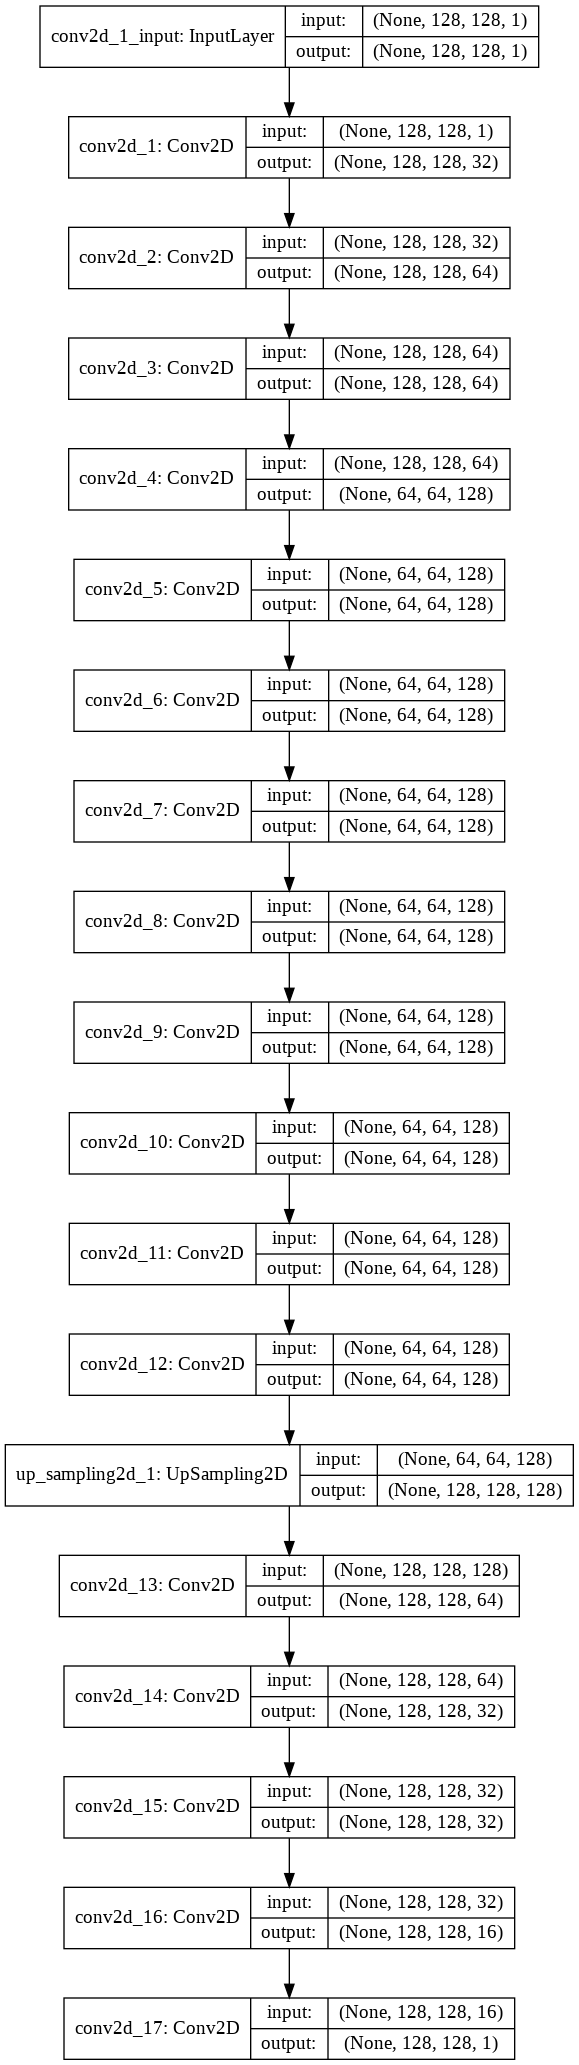

In [11]:
from keras.utils import plot_model, vis_utils
from IPython.display import Image
from IPython.display import display

import IPython

model = defineModel()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
display(Image(retina=True,filename='model.png'))


In [0]:
import keras.backend as K
import tensorflow as tf 


def getMaskArray(aSize, mSize):
    m = np.ones((aSize, aSize))
    haSize = int(aSize/2)
    hmSize = int(mSize/2)
    m[haSize-hmSize:haSize+hmSize, haSize-hmSize:haSize+hmSize] = 0
    return m


def getLoss(aSize, mSize):
    
    m1 = getMaskArray(aSize,mSize)
    m2 = np.repeat(m1[np.newaxis, :, :, np.newaxis], BATCH_SIZE, axis=0)
    mask = K.variable(m2)
    invMask = K.variable(1-mask)
    imgSize = K.variable(IMAGE_SIZE)
    batchSize = K.variable(BATCH_SIZE)
    lam = K.variable(LAMBDA)
    def anoLoss(y_true, y_pred):
        d1 = tf.math.multiply(mask, (y_true - tf.math.multiply(invMask,y_pred)))
        d2 = tf.math.multiply(invMask, (y_true - tf.math.multiply(invMask,y_pred)))
        #v1 = (lam*tf.norm(d1,ord=1))/(imgSize*imgSize)
        #v2 = (lam*tf.norm(d2,ord=1))/(imgSize*imgSize)
        v1 = (lam*tf.norm(d1,ord=1))
        v2 = (lam*tf.norm(d2,ord=1))
        r = (v1+v2)/batchSize
        #d = tf.Print(r, [r], "Inside loss function")
        return r
        
    return anoLoss



In [13]:
model = defineModel()

#ADAM optimizer 
adam = Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=pow(10,-8))

model.compile(optimizer=adam,
              loss=getLoss(IMAGE_SIZE,MASK_SIZE)) # Call the loss function with the selected layer

#model.compile(optimizer="adam",
#              loss="mse",
#              metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=1, kernel_size=3, dilation_rate=1, strides=1, padding="same", activation="elu", kernel_constraint=<__main__....)`
W0904 09:01:06.716444 140109996885888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/variables.py:2618: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0904 09:01:06.749124 140109996885888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [17]:
#boostx : don't know why the system add some .xxx.png files, so delete it.
!rm -rf /content/data/train/._*



X_train_generator = train_generator
batch_size = X_train_generator.batch_size        
n_steps = int(X_train_generator.samples / batch_size)

mask = getMaskArray(IMAGE_SIZE, MASK_SIZE)
#invMask = 1-mask
mulMask = np.repeat(mask[np.newaxis, :, :, np.newaxis], BATCH_SIZE, axis=0)


SAVE_EVERY_EPOCH=5
reloadWeights = True
maxEpoch = 50
field_names = ['epoch', 'file-name','loss']
_lastEpoch = 0

#Initialize train status file
if (not os.path.isfile(WEIGHTS_PATH+"train-status.csv")) or (reloadWeights == False):
    with open(WEIGHTS_PATH+"train-status.csv","w") as trainStatusFile:
        tStatusLogger = csv.DictWriter(trainStatusFile, fieldnames=field_names)
        tStatusLogger.writeheader()
else:
    df = pd.read_csv(WEIGHTS_PATH+"train-status.csv")
    if df.shape[0] > 0:
        _lastEpoch = df["epoch"].iloc[-1]
        lastFileName = df["file-name"].iloc[-1]
        print("Last Completed Epoch:", _lastEpoch)
        print("Loading Weights from:", lastFileName)
        model.load_weights(WEIGHTS_PATH+lastFileName)

_lastEpoch += 1
for epoch in range(_lastEpoch, maxEpoch+1):
    print("Epoch:", epoch)
    n_iter = int(X_train_generator.samples / BATCH_SIZE)
    progress_bar = Progbar(target=n_iter)
    lossHist = []
    for index in range(n_iter):
        image_batch = (X_train_generator.next().astype(np.float32) - 127.5) / 127.5
        if (image_batch.shape[0] != BATCH_SIZE):
            #Incomplete last batch, skip to next batch
            image_batch = (X_train_generator.next().astype(np.float32) - 127.5) / 127.5
        
        #image_batch = image_batch[:,:,:,0]
        masked_batch = np.multiply(image_batch,mulMask)
        X = masked_batch
        y = image_batch
        lossVal = model.train_on_batch(X,y)
        progress_bar.update(index+1, values=[(model.metrics_names[0],lossVal)])
        lossHist.append(lossVal)
    if epoch % SAVE_EVERY_EPOCH == 0:
        fileName = WEIGHTS_PATH+'model.epoch-{}.h5'.format(epoch)
        print("\nSaving Weights to:", fileName)
        model.save_weights(fileName, True)
        
        tStatus = {}
        tStatus['epoch'] = epoch
        tStatus['file-name'] = os.path.basename(fileName)
        tStatus['loss'] = round(sum(lossHist)/len(lossHist),4)

        with open(WEIGHTS_PATH+"train-status.csv","a") as trainStatusFile:
            tStatusLogger = csv.DictWriter(trainStatusFile, fieldnames=field_names)
            tStatusLogger.writerow(tStatus)
            

#model.fit_generator(generator=train_generator,steps_per_epoch=128)


Epoch: 1


FileNotFoundError: ignored

In [0]:
import cv2
from numpy import newaxis
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

def anomalyScore(y_true, y_pred):
    mask = getMaskArray(IMAGE_SIZE, 24)
    invMask = 1-mask
    y_masked_true = np.multiply(y_true, mask)
    y_masked_pred = np.multiply(y_pred, mask)
    diff = ((y_masked_true-y_masked_pred)**2).mean()
    return diff

def testModel(model, dir):
  #boostx : train_directory not defined error, define here, use the training directory fist. 
    train_directory=TRAIN_PATH
  #boostx :   folder=train_directory+dir
    folder=train_directory
    files = []
    scores = [] 
    mask = getMaskArray(IMAGE_SIZE, MASK_SIZE)
    invMask = 1-mask
    mulMask = invMask[:, :, np.newaxis]

    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename),0)
        #boostx : to avoid broken image error
        try:
          img = cv2.resize(img,(128,128))
          imgScaled = (img.astype(np.float32) - 127.5) / 127.5
          imgScaled = np.array([imgScaled])
          imgScaled = imgScaled[:,:,:,newaxis]
          imgMasked = np.multiply(imgScaled,mulMask)
          imgPredict = model.predict(imgMasked)
          score = anomalyScore(imgMasked, imgPredict)
          files.append(filename)
          scores.append(score)
        except Exception as e:
          print(str(e))
        #boost x end
        #plt.imshow(img, cmap='gray')
        #plt.imshow(im3[0,:,:,0], cmap='gray')
        #plt.imshow(imgPredict[0,:,:,0], cmap='gray')
        #plt.show()
    return pd.DataFrame({'files':files, 'scores':scores})


In [0]:
#boostx : uncommented technoDf
technoDf = testModel(model,"techno")
#technoDf["class"] = "techno"
#print("Technno:\n",technoDf)

naturalDf = testModel(model,"natural")

#naturalDf["class"] = "natural"
#print("Natural:\n",naturalDf)

#resultsDf = technoDf.append(naturalDf,ignore_index =True)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
naturalDf.hist()

In [0]:
naturalDf.sort_values("scores").tail(1000)

In [0]:
dfFileIndex = naturalDf.set_index("files")
print(dfFileIndex.head())
for dir in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"):
    print("Scores for:", dir+":")
    for file in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"+dir):
        print(file,":",dfFileIndex.loc[file].scores)
       

In [0]:
#boostx : ignored this line   dfFileIndex.loc["img_x_11520_y_16512.jpg"]

In [0]:
found = []
notFound = []

for img in technoDf[technoDf.scores>cutOffScore].files:
    for dir in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"):
        if dir not in notFound:
            notFound.append(dir)

for img in technoDf[technoDf.scores>cutOffScore].files:
    for dir in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"):
        if img in os.listdir(TMP_PATH+"content/gdrive/My Drive/aiml/OmdenaMars/data/techno/"+dir):
            if dir not in found:
                found.append(dir)
                if dir in notFound:
                    notFound.remove(dir)

print("Anomaly detected:",found)
print("Anomaly not-detected:",notFound)